## Data Cleansing

In [165]:
import pandas as pd
df = pd.read_csv("data/car_data.csv")
df

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
...,...,...,...,...,...
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [167]:
# checking null data
df.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [168]:
# checking duplicated data
duplic= df[df.duplicated()]
duplic.shape

(0, 5)

In [169]:
# drop unnecessary column
df = df.drop(["User ID", "Gender"], axis=1)
df

,Age,AnnualSalary,Purchased
0,35,20000,0
1,40,43500,0
2,49,74000,0
3,40,107500,1
4,25,79000,0
...,...,...,...
995,38,59000,0
996,47,23500,0
997,28,138500,1
998,48,134000,1


In [170]:
# data details
df.AnnualSalary.describe()

count      1000.000000
mean      72689.000000
std       34488.341867
min       15000.000000
25%       46375.000000
50%       72000.000000
75%       90000.000000
max      152500.000000
Name: AnnualSalary, dtype: float64

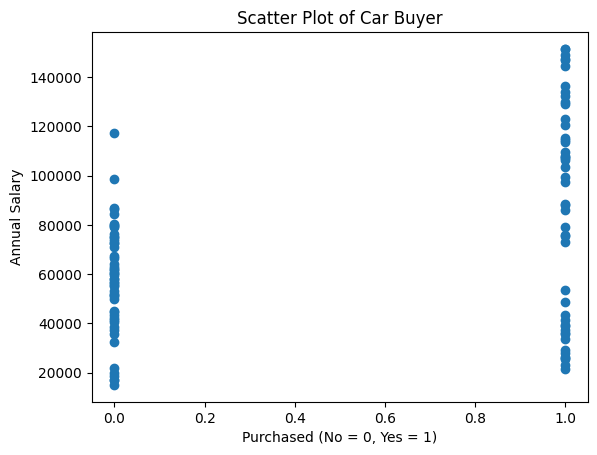

In [171]:
# data visualization
import matplotlib.pyplot as plt

few = df.head(100)
plt.scatter(few["Purchased"], few["AnnualSalary"])
plt.xlabel("Purchased (No = 0, Yes = 1)")
plt.ylabel("Annual Salary")
plt.title("Scatter Plot of Car Buyer")
plt.show()

<AxesSubplot: xlabel='AnnualSalary'>

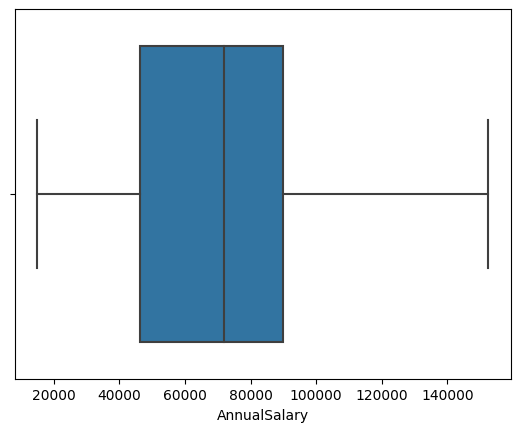

In [172]:
# checking data outlier 
import seaborn as sns
sns.boxplot(x=df['AnnualSalary'])

In [173]:
# data normalization (minmax)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
newDf = scaler.fit_transform(df[["AnnualSalary", "Age"]])
newDf

array([[0.03636364, 0.37777778],
       [0.20727273, 0.48888889],
       [0.42909091, 0.68888889],
       ...,
       [0.89818182, 0.22222222],
       [0.86545455, 0.66666667],
       [0.42545455, 0.57777778]])

In [174]:
df = pd.concat([df, pd.DataFrame(newDf, columns=["Salary", "NewAge"])], axis=1)
df = df.drop(["AnnualSalary", "Age"], axis=1)    
df


,Purchased,Salary,NewAge
0,0,0.036364,0.377778
1,0,0.207273,0.488889
2,0,0.429091,0.688889
3,1,0.672727,0.488889
4,0,0.465455,0.155556
...,...,...,...
995,0,0.320000,0.444444
996,0,0.061818,0.644444
997,1,0.898182,0.222222
998,1,0.865455,0.666667


## Modeling

In [175]:
x = df.iloc[:, [1, 2]]
y = df.iloc[:, 0] 

In [176]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [177]:
x_test, x_train, y_test, y_train = train_test_split(x, y, train_size=0.3,random_state=1)

In [178]:
model = DecisionTreeClassifier(criterion="entropy", random_state=100)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [179]:
y_pred = model.predict(x_test)

In [180]:
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.8466666666666667
